In [7]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading the dataset
data_set = 'Amazon sale report.csv' 
df = pd.read_csv(data_set)

In [9]:
# Data Set Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [10]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [11]:
#check for null values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [12]:
# Impute missing numerical values with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [13]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                   0
Amount                     0
ship-city                  0
ship-state                 0
ship-postal-code           0
ship-country               0
B2B                        0
fulfilled-by               0
New                   128976
PendingS              128976
dtype: int64

In [14]:
df = df.drop(columns=['New','PendingS'])

In [15]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [16]:
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
dtype: int64

In [17]:
df.duplicated().sum()

168

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [21]:
df.shape

(128808, 19)

In [22]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency',
       'ship-city', 'ship-state', 'ship-country', 'fulfilled-by'],
      dtype='object')

Numerical type columns:
Index(['index', 'Qty', 'Amount', 'ship-postal-code'], dtype='object')


In [23]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [24]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [25]:
print("Categorical Features:", categorical)
print()
print("Non-Categorical Features:", non_categorical)
print()
print("Discrete Features:", discrete)
print()
print("Continuous Features:", continuous)

Categorical Features: ['Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Courier Status', 'currency', 'ship-country', 'fulfilled-by']

Non-Categorical Features: ['Order ID', 'Date', 'Status', 'Size', 'ship-city', 'ship-state']

Discrete Features: []

Continuous Features: ['index', 'Qty', 'Amount', 'ship-postal-code']


In [26]:
# Detect outliers using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, 
                       np.where(df[col] < lower_bound, lower_bound, df[col]))

C:\Users\pavan\AppData\Local\Temp\ipykernel_27356\2991458669.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


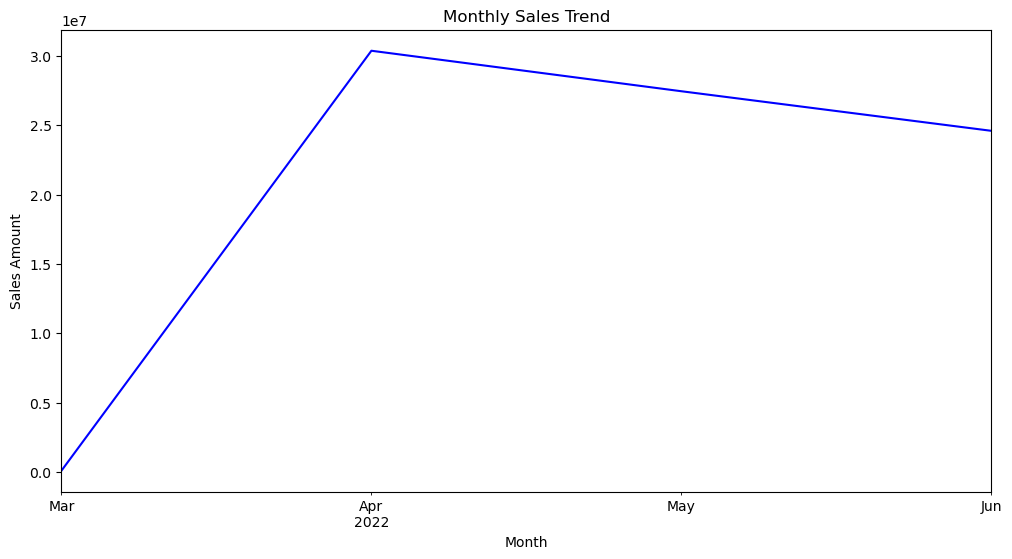

In [27]:
# Convert 'date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Plot time-series sales trend
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', title='Monthly Sales Trend', color='blue')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()


###### The sales amount increased significantly from March to April, indicating a potential success in marketing efforts, seasonal demand, or new product launches.

###### Sales started declining after April, suggesting the end of a seasonal peak, reduced demand, or insufficient inventory to maintain the growth trend.

###### For the Growth Period (March to April):

    Identify the factors that drove the rapid growth, such as promotions, discounts, product launches, or external market conditions, and replicate these strategies.


###### For the Decline Period (Post-April):

    Investigate reasons for the sales drop, such as customer churn, product lifecycle, or competition.
    Introduce new marketing strategies, product variations, or incentives to sustain growth in the following months.

###### If this pattern repeats annually, consider it a seasonal trend and plan inventory and marketing strategies accordingly to maximize revenue during the peak months.

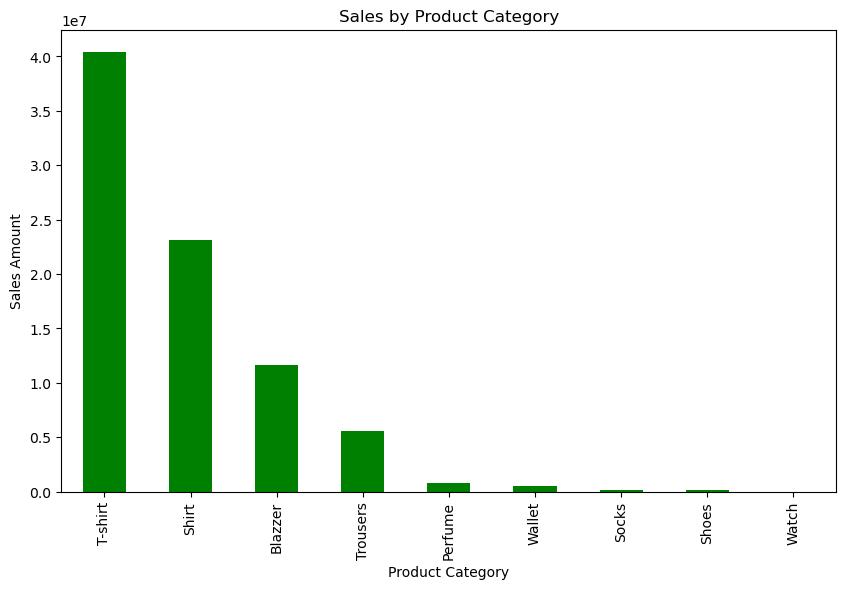

In [28]:
# Product categories
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='green')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.show()

###### T-Shirts are the highest-grossing category, significantly outperforming others, indicating strong demand. This category should be prioritized for inventory and marketing efforts.

###### Shirts and Blazers also contribute a substantial portion of sales. These categories might benefit from additional promotions or campaigns to further boost their revenue.

###### Products like Perfume, Wallet, Socks, Shoes, and Watches have much lower sales compared to the top categories. This could be due to:

    --Limited customer interest.
    --Ineffective marketing or lower visibility.
    --Insufficient inventory or pricing issues.

##### ACTION PLAN:

###### Focus on Best Sellers: Increase stock and expand marketing campaigns for T-Shirts and Shirts, as they clearly drive the most revenue.

###### Promote Low-Selling Items:

    --Offer discounts, bundles, or promotional deals on low-performing categories.
    --Assess and improve their placement in physical or online stores to increase visibility.

###### Analyze the Gap: Conduct a deeper analysis of why certain categories are underperforming. For instance:

   --Are prices too high?
   --Is there a lack of demand in the target market?
   --Is the marketing strategy ineffective for these items?

###### If applicable, assess whether these trends vary by season or region. For example, Shoes and Watches might sell better in specific areas or during particular times of the year.

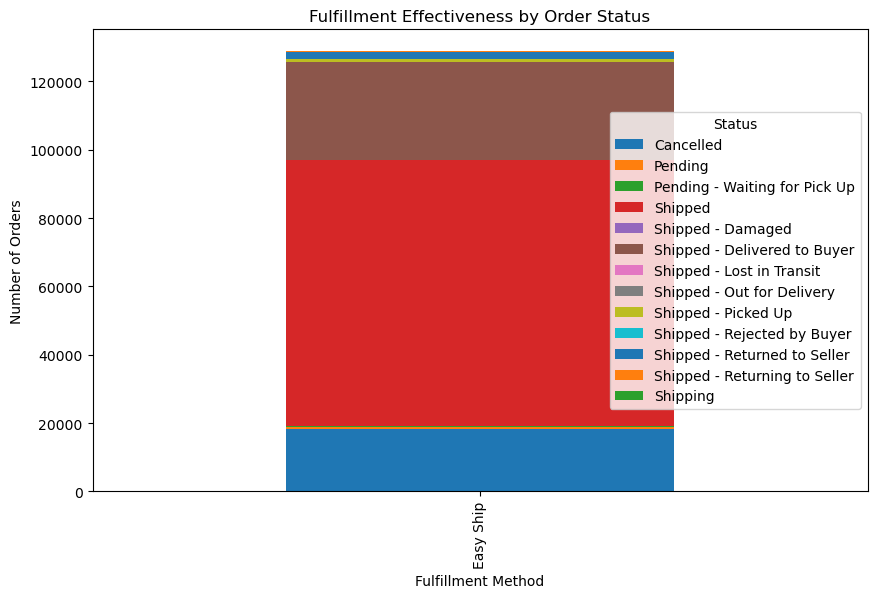

In [29]:
fulfillment_status = df.groupby(['fulfilled-by', 'Status']).size().unstack(fill_value=0)

# Stacked bar chart
fulfillment_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fulfillment Effectiveness by Order Status')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()

###### The red section, representing "Shipped", occupies a significant proportion of the total number of orders. This indicates that most orders reach the shipped status successfully under the Easy Ship fulfillment method.

###### The blue section ("Cancelled") shows a smaller proportion relative to the total, suggesting that cancellations are relatively infrequent.

###### Smaller colored sections such as "Shipped - Damaged", "Shipped - Returned to Seller", and "Shipped - Rejected by Buyer" imply that logistical or delivery issues occur but are rare compared to the shipped and completed orders.

###### There is a visible segment for "Pending" and "Pending - Waiting for Pick Up", which might indicate areas for operational improvement in initiating the shipping process faster.

###### The chart suggests that the Easy Ship method handles a large volume of orders efficiently, with relatively minor issues reflected by the smaller sections.

###### Recommendations:

    --Focus on further reducing cancellation and damage rates, as even small percentages can translate into significant losses at scale.
    --Analyze bottlenecks causing delays in "Pending" statuses to enhance fulfillment speed.
    --Monitor and address specific statuses like "Lost in Transit" or "Rejected by Buyer" for continuous process improvement.

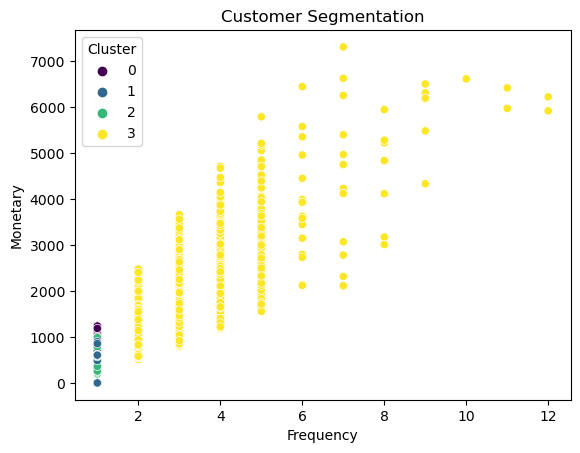

In [30]:
# RFM Scores
now = df['Date'].max()  # Latest date in dataset
rfm = df.groupby('Order ID').agg({
    'Date': lambda x: (now - x.max()).days,  # Recency
    'Order ID': 'count',                    # Frequency
    'Amount': 'sum'                         # Monetary
}).rename(columns={'Date': 'Recency', 'Order ID': 'Frequency', 'Amount': 'Monetary'})

# K-Means for Clustering
from sklearn.cluster import KMeans
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x: (x - x.mean()) / x.std())
kmeans = KMeans(n_clusters=4, random_state=42).fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

# Visualize Clusters
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()


###### Cluster 3 (Yellow):

    --This cluster dominates the upper-right region of the chart, indicating customers with high purchase frequency and high monetary value.
    --Likely represents the most valuable customers (loyal and high-spending).
    --These customers should be prioritized for retention strategies like loyalty programs and exclusive offers.

###### Clusters 0, 1, and 2 (Purple, Blue-Green, Green):

    --These clusters are concentrated in the lower-left region, with low frequency and low monetary value.
    --Likely represent new, occasional, or inactive customers.
    --Strategies for these groups could include targeted promotions or re-engagement campaigns.

###### Distribution by Frequency:

    The relationship between frequency and monetary value appears to be generally positive, i.e., as customers purchase more frequently, they tend to spend more overall.

###### Segmentation Value:

    The segmentation provides a clear way to categorize customers and tailor strategies based on their purchasing patterns.

###### Recommendations:

    --For Cluster 3: Strengthen loyalty by offering rewards, personalized offers, and exclusive deals to maintain engagement.
    --For Clusters 0, 1, and 2: Implement strategies to increase purchase frequency and monetary value, such as:
        -Targeted discounts or bundled deals.
        -Personalized marketing campaigns to encourage repeat purchases.
        -Surveys to understand reasons for lower engagement.

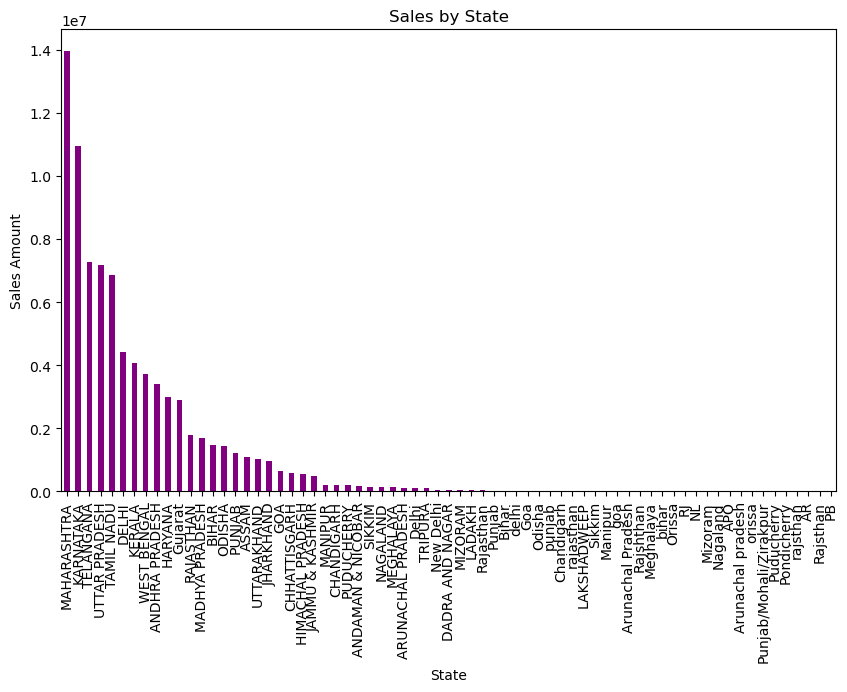

In [31]:
# Group by state
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
state_sales.plot(kind='bar', color='purple')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales Amount')
plt.show()


###### Highly Uneven Distribution:  
   -The chart shows a significant variation in sales across different states. A few states, such as *Maharashtra*, dominate the sales, while others contribute very little. This suggests that sales are concentrated in certain regions.


###### Top Performing States:  
   States like Maharashtra, Karnataka, and Tamil Nadu have much higher sales compared to others. These states could be primary markets due to factors like higher population, better infrastructure, or economic development.


###### Low Sales Regions:  
   States on the far-right side of the chart (e.g., Lakshadweep, Mizoram, Nagaland) have minimal sales. These could be less developed markets or regions with smaller populations.


###### Potential Opportunities:  
   Regions with low sales could represent untapped or underpenetrated markets. It may be worth investigating if there are logistical, cultural, or economic barriers to increasing sales in these areas.


###### Strategic Focus:  
   Companies may want to focus marketing efforts and resources on high-sales states while exploring ways to expand in low-sales states to achieve more balanced growth.


In [32]:
# Top Customers by Revenue
top_customers = df.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(10)
top_customers

Order ID
405-8750647-4224357    7315.00
408-3363121-6123562    6633.00
408-3317403-1729937    6620.00
406-9002076-4152331    6509.00
408-4410167-4971567    6451.00
404-9932919-6662730    6423.00
171-0706521-2133101    6313.00
403-9984530-4477124    6258.00
171-5057375-2831560    6227.62
404-3701762-8241125    6198.00
Name: Amount, dtype: float64

## Amazon Sales Report Analysis
This section explores the sales trends, product performance, customer segmentation, and geographical insights from the dataset. It aims to derive actionable recommendations for business growth.

In [37]:
# Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_sets = 'Amazon sale report.csv'  # Replace with your actual dataset path
df = pd.read_csv(data_sets)

# Display the first few rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [40]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


### Sales Trends Over Time
Analyzing revenue trends over time helps identify patterns and peak periods.

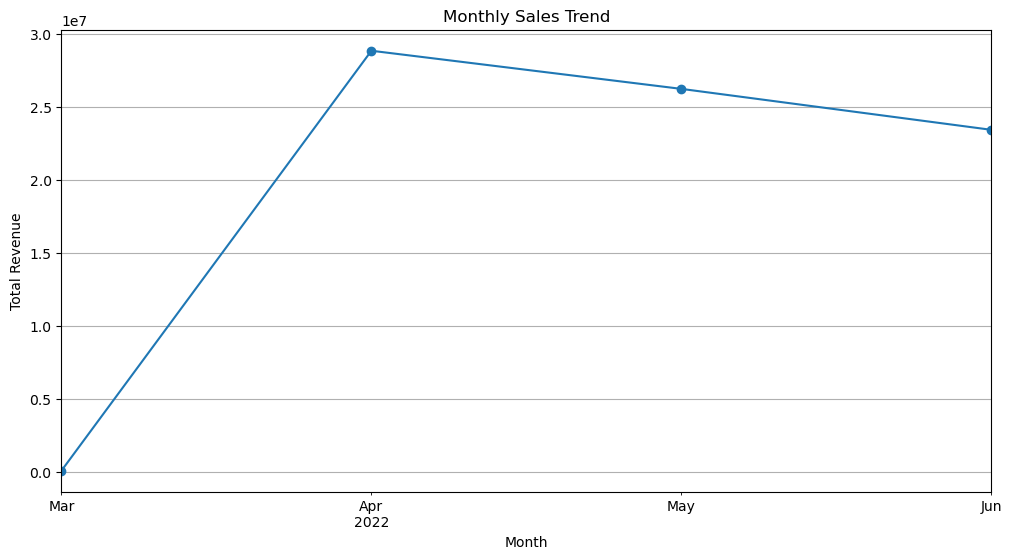

In [42]:
# Convert the 'date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and calculate total revenue
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

### Product and Fulfillment Analysis
Evaluating sales performance by product and fulfillment method to identify strengths and areas for improvement.

In [43]:
# Group by product and fulfillment method to calculate total revenue
product_sales = df.groupby(['Category', 'Fulfilment'])['Amount'].sum().reset_index()

# Display top-performing products
top_products = product_sales.sort_values(by='Amount', ascending=False).head(10)
top_products

,Category,Fulfilment,Amount
10,T-shirt,Amazon,27637740.00
4,Shirt,Amazon,15173857.00
11,T-shirt,Merchant,11569016.65
0,Blazzer,Amazon,6274047.00
5,Shirt,Merchant,6123913.08
1,Blazzer,Merchant,4941057.12
12,Trousers,Amazon,4131951.00
13,Trousers,Merchant,1214335.30
2,Perfume,Amazon,581747.00
14,Wallet,Amazon,341361.00


### Customer and Geographical Segmentation
Understanding customer behavior and geographical distribution of sales.

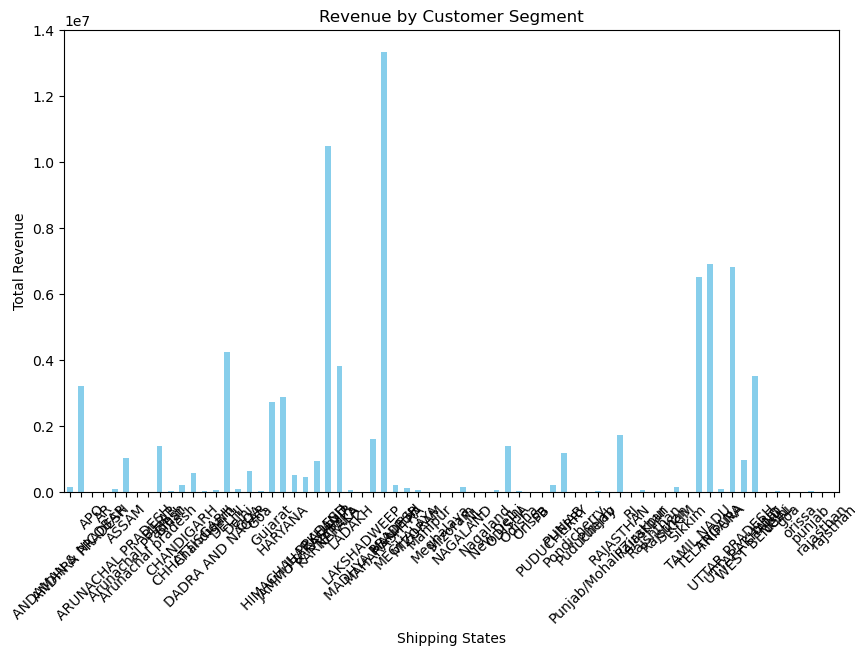

ship-state
ANDAMAN & NICOBAR     157424.62
ANDHRA PRADESH       3217859.86
APO                        0.00
AR                       493.00
ARUNACHAL PRADESH      95235.00
                        ...    
goa                     2467.00
orissa                   597.00
punjab                  8622.00
rajasthan               3946.00
rajsthan                 521.00
Name: Amount, Length: 69, dtype: float64

In [49]:
# Analyze customer segments
customer_segments = df.groupby('ship-state')['Amount'].sum()

# Plot customer segments
plt.figure(figsize=(10, 6))
customer_segments.plot(kind='bar', color='skyblue')
plt.title('Revenue by Customer Segment')
plt.xlabel('Shipping States')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Analyze sales by region
regional_sales = df.groupby('ship-state')['Amount'].sum()
regional_sales

## Summary and Recommendations
### Key Findings:
- Sales trends indicate peak periods and seasonal patterns, with notable revenue spikes during specific months.
- Categories and sizes contributing the most to sales have been identified, providing insights into customer preferences.
- Fulfillment methods such as `Fulfilment` show variation in effectiveness, with some methods outperforming others in delivering orders on time.
- Geographical analysis highlights top-performing states (`ship-state`) and cities (`ship-city`) with the highest sales contributions.

### Recommendations:
1. **Peak Period Strategies**:
   - Align marketing campaigns with peak sales periods identified in the analysis.
   - Introduce discounts or promotions during low-demand periods to balance revenue flow.

2. **Inventory Management**:
   - Prioritize stock for popular categories and sizes to meet customer demand effectively.
   - Reduce inventory for underperforming categories to optimize storage costs.

3. **Fulfillment Optimization**:
   - Invest in improving the performance of less effective fulfillment methods.
   - Streamline logistics to ensure timely delivery in high-demand areas.

4. **Geographical Expansion**:
   - Focus sales and marketing efforts on top-performing states and cities (`ship-state` and `ship-city`).
   - Explore opportunities to expand operations in high-revenue regions.

5. **Customer Engagement**:
   - Offer personalized deals to customers in regions with consistent sales (`ship-country`).
   - Leverage insights into preferred product sizes and categories for targeted marketing.